In [30]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]


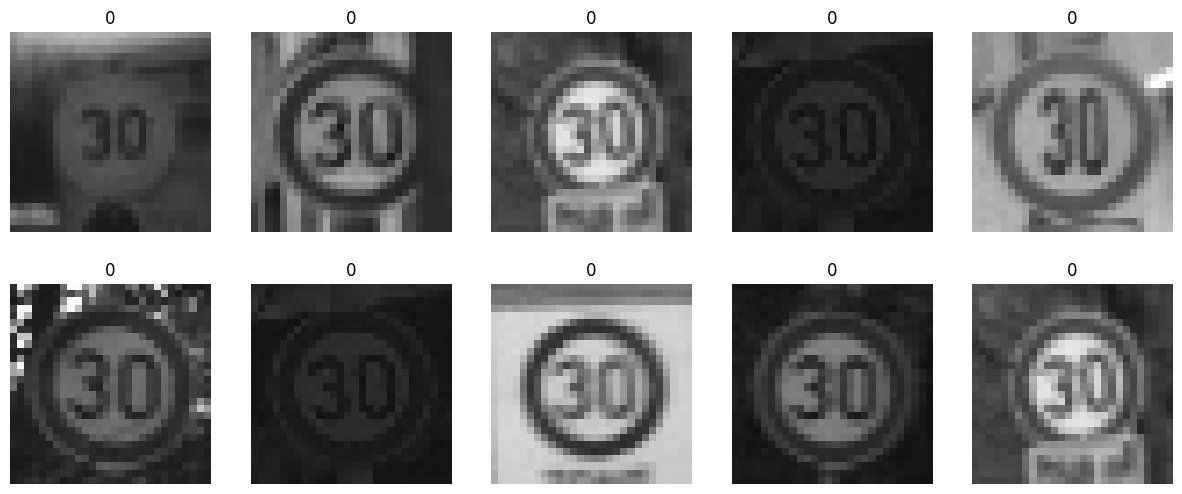

In [31]:
folder = '/content/data'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)


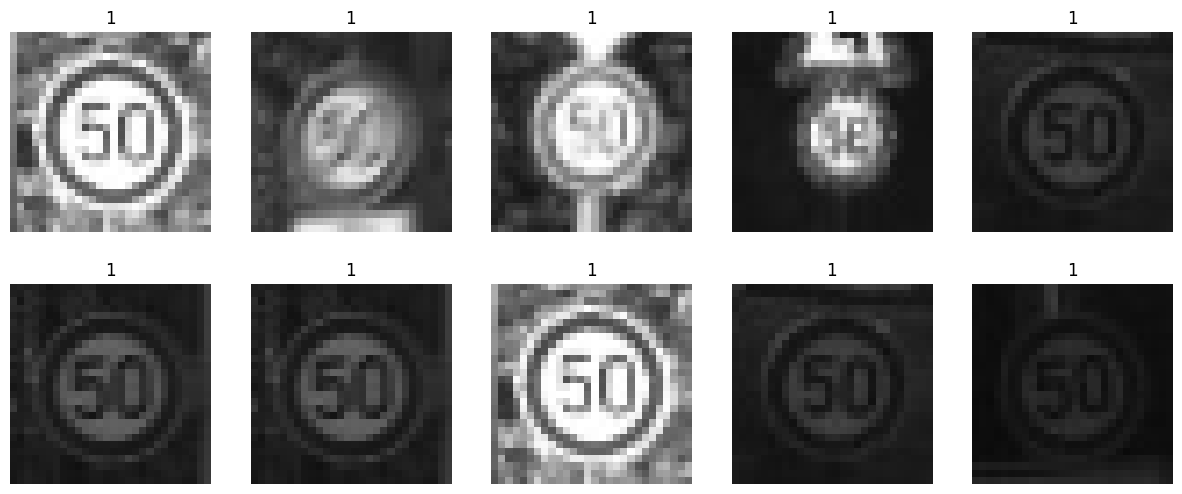

In [32]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [33]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 11
Num samples class_1 10


In [35]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (21, 28, 28)
Labels (21,)


In [36]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)

pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (21, 784)
Elapsed time 0.009840250015258789


In [37]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (21, 784)
Elapsed time 0.0017757415771484375


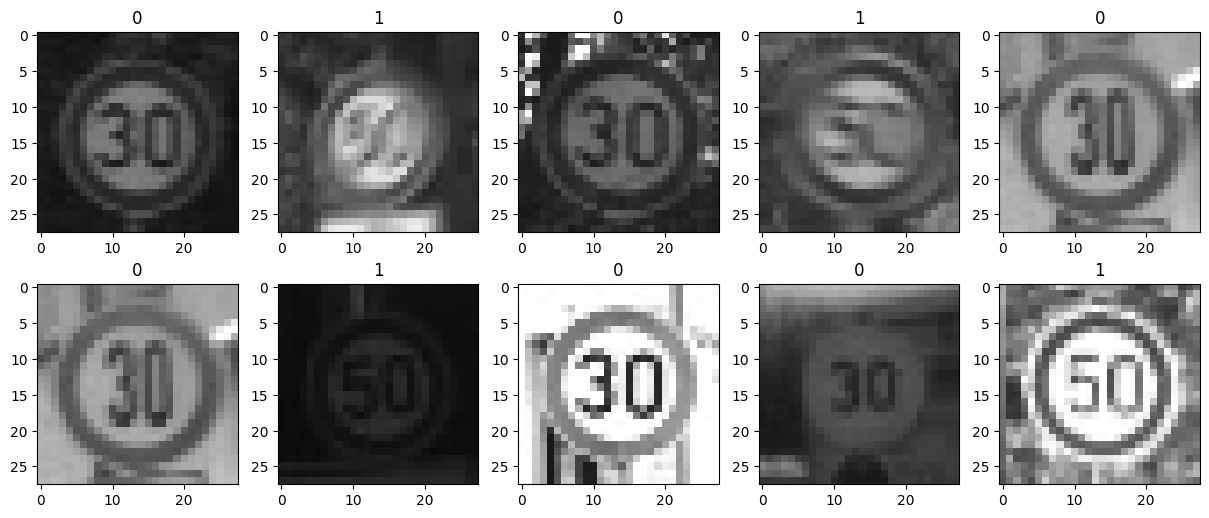

In [38]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [53]:
#Building Neural Network
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [56]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

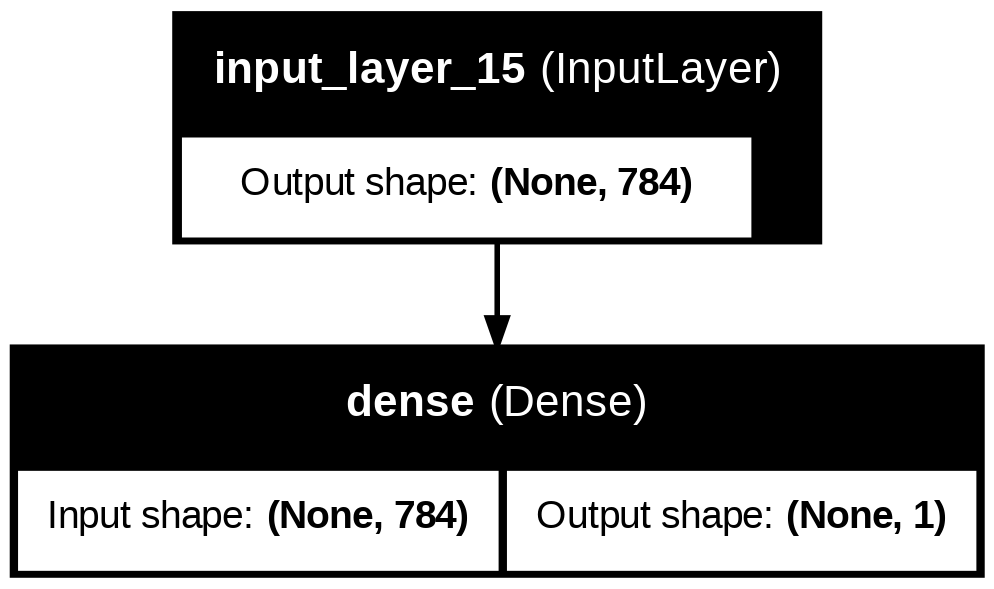

In [58]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [59]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [60]:
#train
history = model.fit(pixels, labels, epochs=10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step - loss: 0.3992
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.4155
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3769
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3453
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3372
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.3275
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3078
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2899
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2820
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2790


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

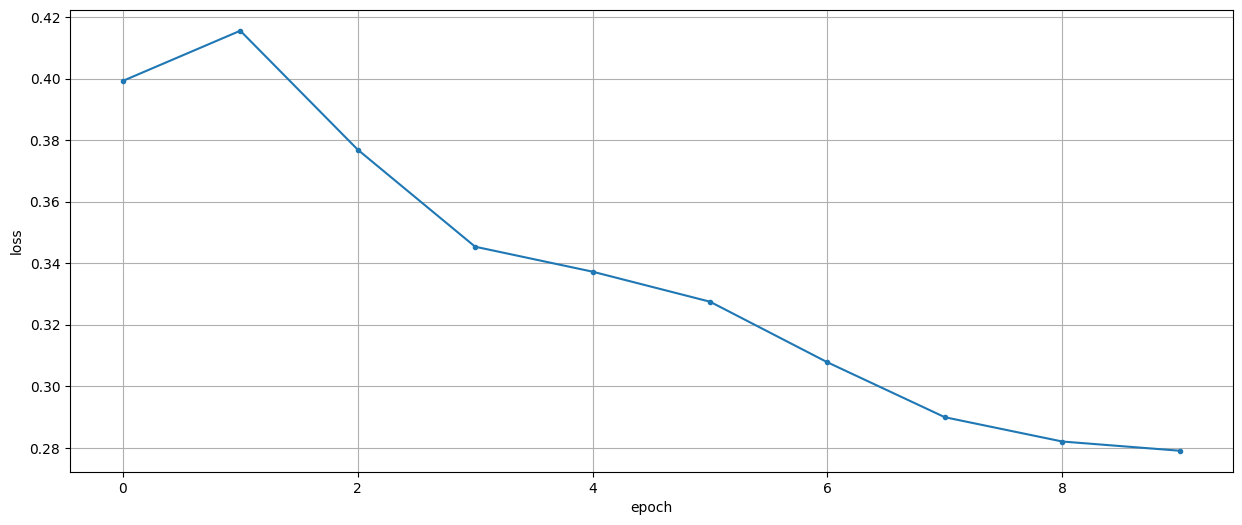

In [61]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.00768276] [0.00768276]


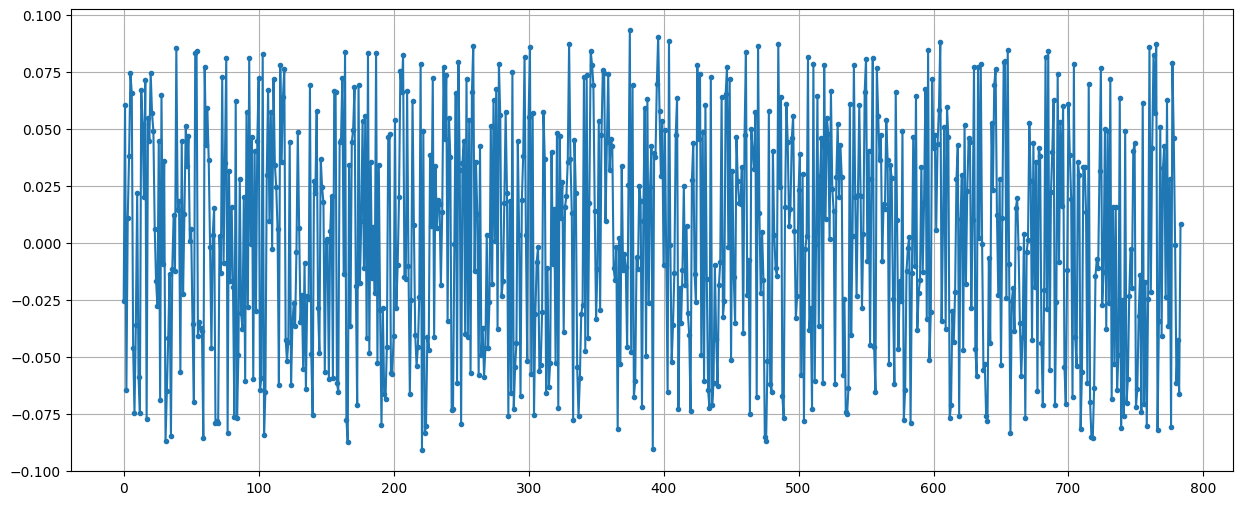

In [62]:
# looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [83]:
#Добавляем слои для улучшенной модели
model_improved = Sequential([
    Dense(128, activation='relu'),
    Dense(len(fnames_0), activation='softmax')])
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
history = model.fit(pixels, labels, epochs=15, batch_size=32)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1185
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1170
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1156
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1141
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1127
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1114
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1100
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1087
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1073
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1061
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1048
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1035
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1023
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1011
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0999


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

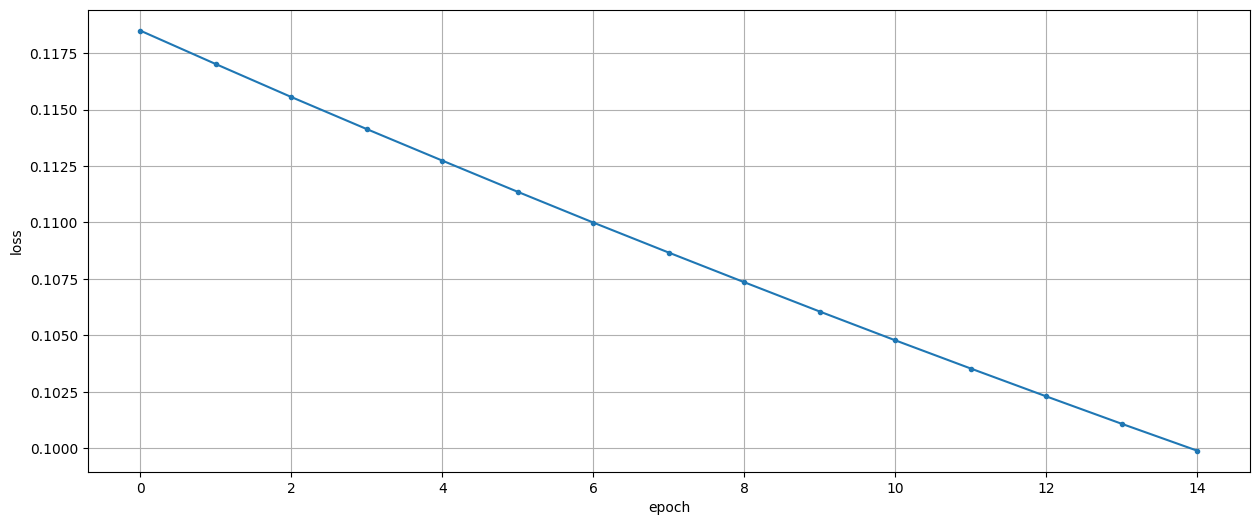

In [87]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')